# Projeto 1 - Ciência dos Dados

Nome: Erick Finger

## Pergunta (s) a ser respondida

Os indicadores usados no cálculo do IDH experienciam melhora no período de 1993-2000 para Laos, Cambodia, Vietnã e Mianmar?

## Explicação da hipótese e mecanismo

## Hipótese:

Ao longo da década de 1990, foram observadas algumas ocorrências na Ásia:
- a ASEAN (Association of Southeast Asian Nations), um bloco que visava o crescimento econômico e o desenvolvimento cultural e social dos países-membros, se tornou um bloco de livre-comércio em 1992;
- em 1995, o Vietnã se junta à ASEAN
- em 1997, Laos e Mianmar se juntam à ASEAN
- em 1999, o Cambodia se junta à ASEAN, sendo o país-membro mais recente

Dado isso, acredita-se que a entrada no bloco por parte dos 4 países mencionados tenha contribuído em aspectos como crescimento econômico, educação e expectativa de vida, ou seja, entrar no bloco contribuiu para o desenvolvimento desses países

## Mecanismo:

Os objetivos fundamentais da ASEAN são a paz regional e o desenvolvimento econômico, social, cultural, tecnológico, científico e administrativo dos países-membros, então juntar-se ao bloco, ainda mais no período em que está se tornando um bloco de livre comércio, deve contribuir em alguma escala para o desenvolvimento de um país.

## Referência:

https://asean.org/asean/about-asean/

## Bases de dados usadas

# GDPpercapita:

https://data.worldbank.org/indicator/NY.GDP.PCAP.KD

# GDP:

https://www.gapminder.org/data/documentation/gd001/

# Expectativa de vida:

https://www.gapminder.org/data/documentation/gd004/

# Tempo na escola de homens entre 15 e 24 anos:

http://ghdx.healthdata.org/record/ihme-data/global-educational-attainment-1970-2015

# Tempo na escola de mulheres entre 15 e 24 anos:

http://ghdx.healthdata.org/record/ihme-data/global-educational-attainment-1970-2015

# Exportações:

https://data.worldbank.org/indicator/NE.EXP.GNFS.ZS

# Importações:

https://data.worldbank.org/indicator/NE.IMP.GNFS.ZS

# Trocas comerciais:

https://data.worldbank.org/indicator/TG.VAL.TOTL.GD.ZS

## Análise de dados

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
gdpcapita = pd.read_excel("gdppercapita_us_inflation_adjusted.xlsx")
gdp = pd.read_excel("total_gdp_ppp_inflation_adjusted.xlsx")
expvida = pd.read_excel("life_expectancy_years.xlsx")
men_school = pd.read_excel("mean_years_in_school_men_15_to_24_years.xlsx")
women_school = pd.read_excel("mean_years_in_school_women_15_to_24_years.xlsx")
exports = pd.read_excel("exports_percent_of_gdp.xlsx")
imports = pd.read_excel("imports_percent_of_gdp.xlsx")
trade = pd.read_excel("merchandise_trade_percent_of_gdp.xlsx")

In [3]:
gdpcapita_idx = gdpcapita.set_index("country")
gdp_idx = gdp.set_index("country")
expvida_idx = expvida.set_index("country")
men_school_idx = men_school.set_index("country")
women_school_idx = women_school.set_index("country")
exports_idx = exports.set_index("country")
imports_idx = imports.set_index("country")
trade_idx = trade.set_index("country")

In [4]:
linhas = ["Cambodia", "Lao", "Myanmar", "Vietnam", "Indonesia", "Malaysia", "Philippines", "Singapore", "Thailand", "Brunei"]
colunas = [ano for ano in range(1993,2014)]
aseancapita = gdpcapita_idx.loc[linhas, colunas]
aseangdp = gdp_idx.loc[linhas, colunas]
aseanexpvida = expvida_idx.loc[linhas, colunas]
aseanmenschool = men_school_idx.loc[linhas,colunas]
aseanwomenschool = women_school_idx.loc[linhas,colunas]
aseanexports = exports_idx.loc[linhas,colunas]
aseanimports = imports_idx.loc[linhas,colunas]
aseantrade = trade_idx.loc[linhas,colunas]

In [5]:
antes_1990 = ["Indonesia", "Malaysia", "Philippines", "Singapore", "Thailand", "Brunei"]
indicadores = [aseancapita, aseangdp, aseanexpvida, aseanmenschool, aseanwomenschool, aseanexports, aseanimports, aseantrade]
for indicador in indicadores:
    indicador.loc[:,"Membro_antes_de_1990"] = "Não"
    indicador.loc[antes_1990,"Membro_antes_de_1990"] = "Sim"

In [6]:
aseangdp_t = aseangdp.loc[:, [1993,2001]]
aseantrade_t = aseantrade.loc[:, [1993,2001]]
df = aseangdp_t.join(aseantrade_t, how="inner", lsuffix="_gdp", rsuffix="_trade")
df.loc[:,"Membro_antes_de_1990"] = "Não"
df.loc[antes_1990,"Membro_antes_de_1990"] = "Sim"

In [7]:
aseanmen_t = aseanmenschool.loc[:,[1993,2001]]
aseanwomen_t = aseanwomenschool.loc[:,[1993,2001]]
aseanschool = aseanmen_t.join(aseanwomen_t, how="inner", lsuffix="_men", rsuffix="_women")
aseanschool.loc[:,1993] = ((aseanschool["1993_men"])**2 + (aseanschool["1993_men"])**2)**(1/2)
aseanschool.loc[:,2001] = ((aseanschool["2001_men"])**2 + (aseanschool["2001_men"])**2)**(1/2)
asean_school = aseanschool.loc[:,[1993,2001]]

In [8]:
aseanexp_t = aseanexpvida.loc[:,[1993,2001]]
df2 = asean_school.join(aseanexp_t, how="inner", lsuffix="_school", rsuffix="_life_expectancy")
asean_school.loc[:,"Membro_antes_de_1990"] = "Não"
asean_school.loc[antes_1990,"Membro_antes_de_1990"] = "Sim"
df2.loc[:,"Membro_antes_de_1990"] = "Não"
df2.loc[antes_1990,"Membro_antes_de_1990"] = "Sim"

In [9]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('eixo x')
    plt.ylabel('eixo y')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()

In [10]:
indicador1 = aseantrade
indicador2 = aseangdp
ano1 = 1993
ano2 = 2001

Ajuste linear entre X3 e X4:
Coeficiente linear: 590604534499.0847
Coeficiente angular: -2214803284.3202615
Ajuste linear entre X3 e X4:
Coeficiente linear: -49101741120.26837
Coeficiente angular: 2364532127.488877


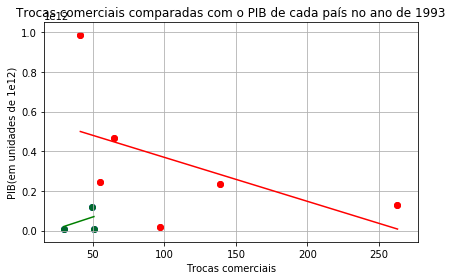

Ajuste linear entre X3 e X4:
Coeficiente linear: 766544790426.9546
Coeficiente angular: -2397316836.748432
Ajuste linear entre X3 e X4:
Coeficiente linear: -115760292408.96835
Coeficiente angular: 2553810671.028587


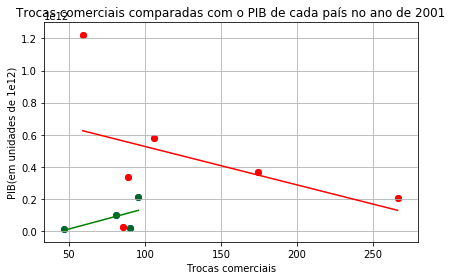

In [11]:
plt.scatter(indicador1.loc[indicador1.Membro_antes_de_1990=="Sim",ano1], indicador2.loc[indicador2.Membro_antes_de_1990=="Sim", ano1], color="r")
reta(indicador1.loc[indicador1.Membro_antes_de_1990=="Sim",ano1], indicador2.loc[indicador2.Membro_antes_de_1990=="Sim", ano1], "r")
plt.scatter(indicador1.loc[indicador1.Membro_antes_de_1990=="Não",ano1], indicador2.loc[indicador2.Membro_antes_de_1990=="Não", ano1], color="b")
reta(indicador1.loc[indicador1.Membro_antes_de_1990=="Não",ano1], indicador2.loc[indicador2.Membro_antes_de_1990=="Não", ano1], "g")
plt.grid(True)
plt.title("Trocas comerciais comparadas com o PIB de cada país no ano de 1993")
plt.xlabel("Trocas comerciais")
plt.ylabel("PIB(em unidades de 1e12)")
plt.show()

plt.scatter(indicador1.loc[indicador1.Membro_antes_de_1990=="Sim",ano2], indicador2.loc[indicador2.Membro_antes_de_1990=="Sim", ano2], color="r")
reta(indicador1.loc[indicador1.Membro_antes_de_1990=="Sim",ano2], indicador2.loc[indicador2.Membro_antes_de_1990=="Sim", ano2], "r")
plt.scatter(indicador1.loc[indicador1.Membro_antes_de_1990=="Não",ano2], indicador2.loc[indicador2.Membro_antes_de_1990=="Não", ano2], color="b")
reta(indicador1.loc[indicador1.Membro_antes_de_1990=="Não",ano2], indicador2.loc[indicador2.Membro_antes_de_1990=="Não", ano2], "g")
plt.grid(True)
plt.title("Trocas comerciais comparadas com o PIB de cada país no ano de 2001")
plt.xlabel("Trocas comerciais")
plt.ylabel("PIB(em unidades de 1e12)")
plt.show()

Nos gráficos acima, podemos observas que entre 1993 e 2001, a maior parte dos países que se juntaram ao bloco na década de 1990 experienciaram aumento discreto em seus PIBs e notório em suas trocas comerciais, indicando melhora econômica. Para melhor visualização, aqui está um DataFrame:

In [12]:
df

,1993_gdp,2001_gdp,1993_trade,2001_trade,Membro_antes_de_1990
country,,,,,
Cambodia,10800000000,17800000000,29.8,90.2,Não
Lao,9230000000,13300000000,50.7,46.9,Não
Myanmar,74100000000,96500000000,NaN,81.2,Não
Vietnam,119000000000,211000000000,49.4,95.6,Não
Indonesia,984000000000,1220000000000,41.2,59.1,Sim
Malaysia,237000000000,369000000000,139.0,174.0,Sim
Philippines,246000000000,334000000000,55.0,88.6,Sim
Singapore,130000000000,203000000000,263.0,266.0,Sim
Thailand,465000000000,580000000000,64.4,106.0,Sim


Mas não se deve apenas olhar para indicadores econômicos... outros dois fatores que são levados em conta para definir o desenvolvimento são o tempo médio escolar e a expectativa de vida, ou seja, educação e qualidade de vida

In [13]:
indicador1 = asean_school
indicador2 = aseanexpvida

Ajuste linear entre X3 e X4:
Coeficiente linear: 56.80803187638096
Coeficiente angular: 1.0965065090455095
Ajuste linear entre X3 e X4:
Coeficiente linear: 28.28669632731399
Coeficiente angular: 4.145608586726153


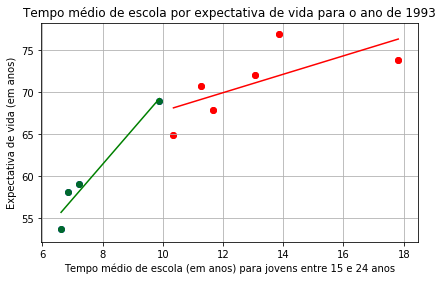

Ajuste linear entre X3 e X4:
Coeficiente linear: 54.566888573638764
Coeficiente angular: 1.2775255772862841
Ajuste linear entre X3 e X4:
Coeficiente linear: 29.68801552644345
Coeficiente angular: 3.6653359755828663


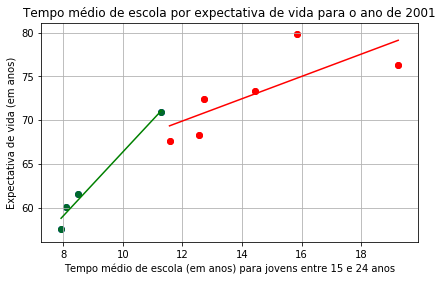

In [14]:
plt.scatter(indicador1.loc[indicador1.Membro_antes_de_1990=="Sim",ano1], indicador2.loc[indicador2.Membro_antes_de_1990=="Sim", ano1], color="r")
reta(indicador1.loc[indicador1.Membro_antes_de_1990=="Sim",ano1], indicador2.loc[indicador2.Membro_antes_de_1990=="Sim", ano1], "r")
plt.scatter(indicador1.loc[indicador1.Membro_antes_de_1990=="Não",ano1], indicador2.loc[indicador2.Membro_antes_de_1990=="Não", ano1], color="b")
reta(indicador1.loc[indicador1.Membro_antes_de_1990=="Não",ano1], indicador2.loc[indicador2.Membro_antes_de_1990=="Não", ano1], "g")
plt.grid(True)
plt.title("Tempo médio de escola por expectativa de vida para o ano de 1993")
plt.xlabel("Tempo médio de escola (em anos) para jovens entre 15 e 24 anos")
plt.ylabel("Expectativa de vida (em anos)")
plt.show()

plt.scatter(indicador1.loc[indicador1.Membro_antes_de_1990=="Sim",ano2], indicador2.loc[indicador2.Membro_antes_de_1990=="Sim", ano2], color="r")
reta(indicador1.loc[indicador1.Membro_antes_de_1990=="Sim",ano2], indicador2.loc[indicador2.Membro_antes_de_1990=="Sim", ano2], "r")
plt.scatter(indicador1.loc[indicador1.Membro_antes_de_1990=="Não",ano2], indicador2.loc[indicador2.Membro_antes_de_1990=="Não", ano2], color="b")
reta(indicador1.loc[indicador1.Membro_antes_de_1990=="Não",ano2], indicador2.loc[indicador2.Membro_antes_de_1990=="Não", ano2], "g")
plt.grid(True)
plt.title("Tempo médio de escola por expectativa de vida para o ano de 2001")
plt.xlabel("Tempo médio de escola (em anos) para jovens entre 15 e 24 anos")
plt.ylabel("Expectativa de vida (em anos)")
plt.show()

Nesses gráficos, podemos observar a educação e a expectativa de vida de cada país nos anos de 1993 e 2001, e, apesar de a diferença não serem expressivas, houve diferenças para Laos, Cambodia, Mianmar e Vietnã, pois os valores de todos aumentaram e ficaram mais próximos dos valores observados no bloco. Para melhor visualização, outro DataFrame:

In [15]:
df2

,1993_school,2001_school,1993_life_expectancy,2001_life_expectancy,Membro_antes_de_1990
country,,,,,
Cambodia,6.858936,8.103444,58.1,60.1,Não
Lao,6.618519,7.933738,53.7,57.5,Não
Myanmar,7.212489,8.485281,59.1,61.5,Não
Vietnam,9.885353,11.285424,69.0,70.9,Não
Indonesia,10.352043,11.568267,64.9,67.6,Sim
Malaysia,13.053191,14.424978,72.1,73.3,Sim
Philippines,11.681404,12.558216,67.9,68.3,Sim
Singapore,13.845151,15.839192,76.9,79.8,Sim
Thailand,11.271282,12.713780,70.8,72.4,Sim


## Conclusão

Como podemos observar nos gráficos, os valores dos indicadores observados em Laos, Cambodia, Vietnã e Mianmar eram bem pequenos em 1993 quando comparados com os valores do resto dos países da ASEAN no mesmo ano. No entanto, à medida que o tempo passa e os 4 países se juntam ao bloco, podemos observar, como nos gráficos de 2001, que os valores dos 4 países se aproximaram dos valores do resto do bloco, provando que entrar no bloco contibuiu para o desenvolvimento desses países. Ou seja, minha hipótese estava correta, *quot erat demonstratum*

Obs: Esses anos foram escolhidos especificamente pois em 1993 nenhum dos 4 países fazia parte da ASEAN e em 2001 os 4 já eram membros